# k-Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## k-Neighbors classification

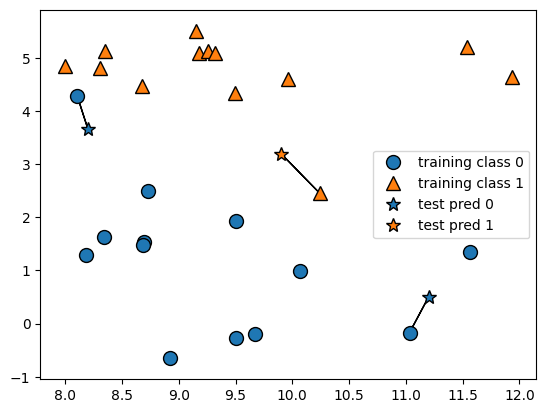

In [2]:
from helpers import plot_knn_classification

plot_knn_classification.plot_knn_classification(n_neighbors=1)

> For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance.

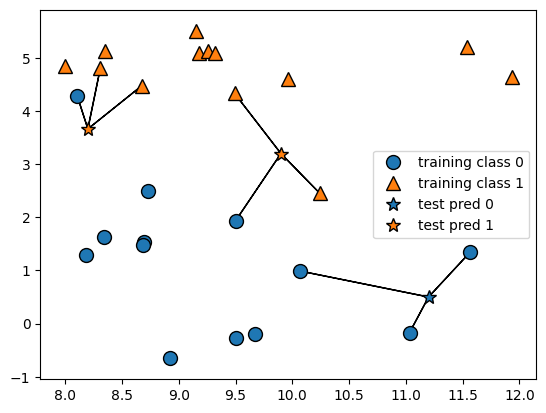

In [3]:
plot_knn_classification.plot_knn_classification(n_neighbors=3)

In [4]:
import helpers
from sklearn.model_selection import train_test_split

X, y = helpers.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
X,y

(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [6]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [8]:
clf

KNeighborsClassifier(n_neighbors=3)

In [9]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
print(f"Test set predictions: {clf.predict(X_test)}")

Test set predictions: [1 0 1 0 1 0 0]


In [11]:
print(f"Test set accuracy: {clf.score(X_test, y_test):.2f}")

Test set accuracy: 0.86


### Analyzing KNeighborsClassifier

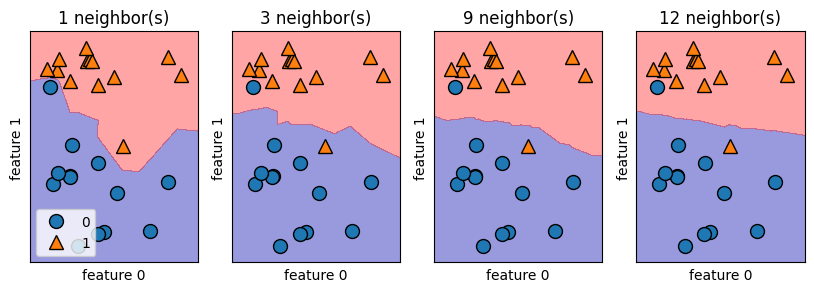

In [12]:
from helpers.plot_2d_separator import plot_2d_separator
from helpers.tools import discrete_scatter

fig, axes = plt.subplots(1, 4, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9, 12], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

    axes[0].legend(loc=3)

- A **smoother boundary corresponds to a simpler model.**


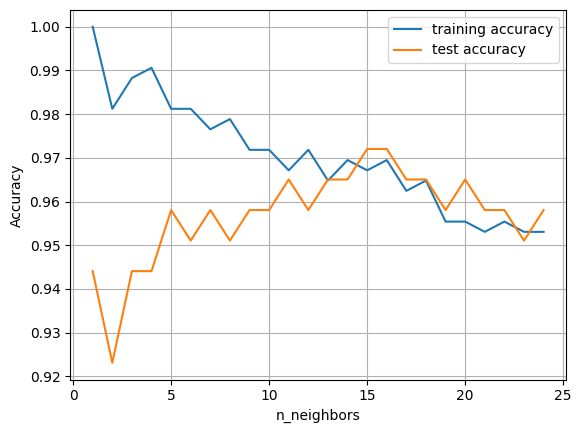

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 25
neighbors_settings = range(1, 25)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_scaled, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test_scaled, y_test))
    
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.grid()
plt.show()

## k-neighbors regression

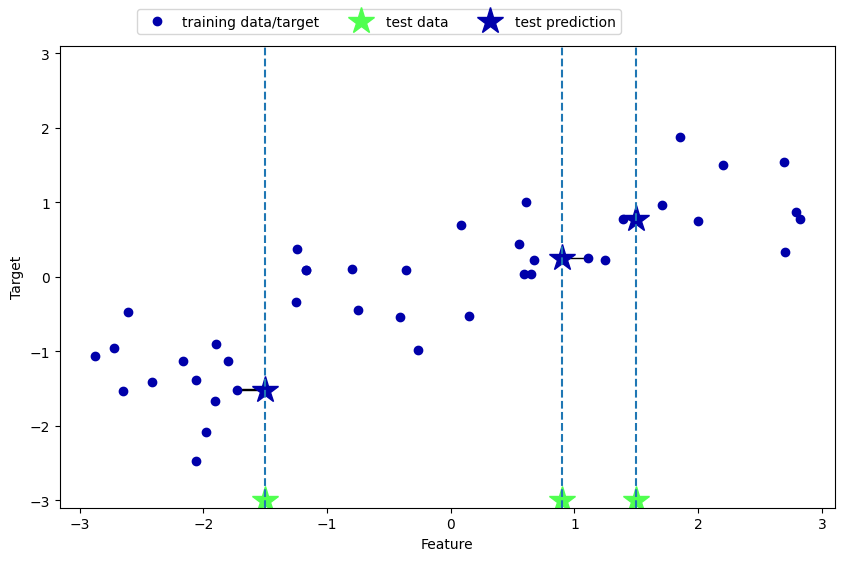

In [15]:
from helpers import plot_knn_regression

plot_knn_regression.plot_knn_regression(n_neighbors=1)
plt.show()

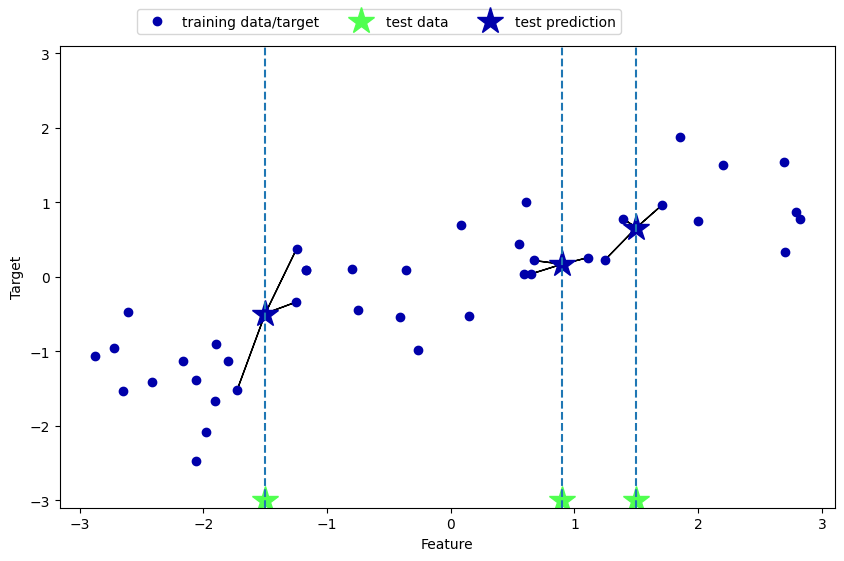

In [16]:
plot_knn_regression.plot_knn_regression(n_neighbors=3)
plt.show()

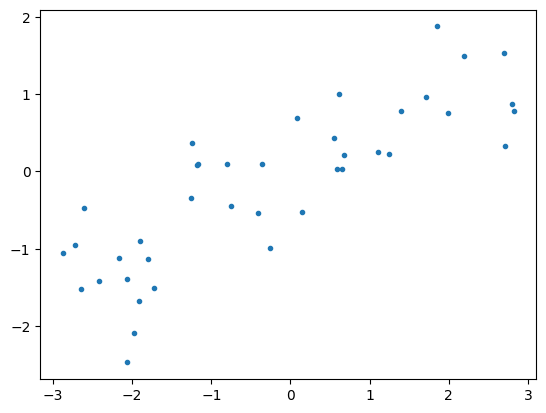

In [17]:
import helpers
from sklearn.neighbors import KNeighborsRegressor

X, y = helpers.datasets.make_wave(n_samples=40)

plt.plot(X,y, ".")
plt.show()

In [18]:
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [19]:
print(X_test)

[[-1.24713211]
 [ 0.67111737]
 [ 1.71105577]
 [-2.06388816]
 [-2.87649303]
 [-1.89957294]
 [ 0.55448741]
 [ 2.81945911]
 [-0.40832989]
 [-2.72129752]]


In [20]:
print(f"Test set predictions:\n{reg.predict(X_test)}")

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [21]:
print(f"Test set R^2: {reg.score(X_test, y_test):.2f}")

Test set R^2: 0.83


### Analyzing KNeighborsRegressor

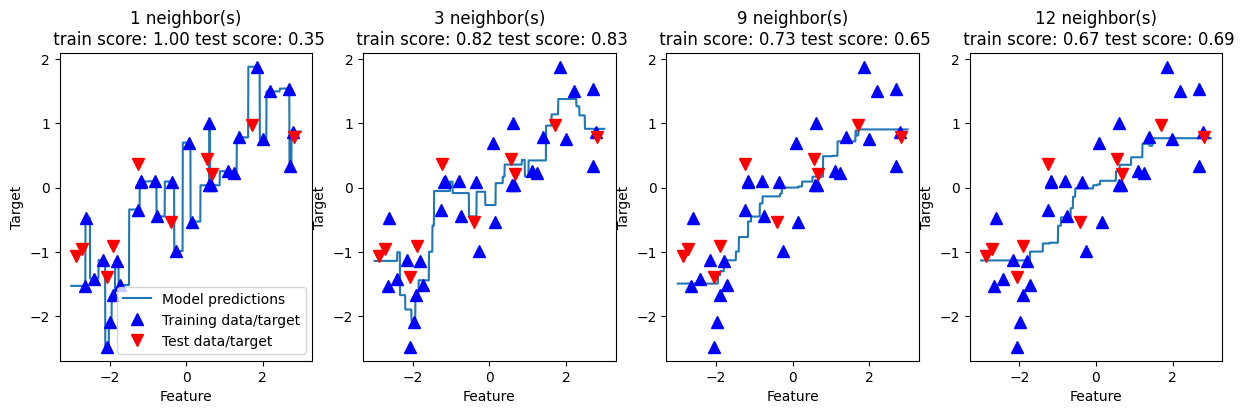

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9, 12], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c="blue", markersize=8)
    ax.plot(X_test, y_test, 'v', c="red", markersize=8)
    ax.set_title(f"{n_neighbors} neighbor(s)\n train score: {reg.score(X_train, y_train):.2f} test score: {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

 
- Considering **more neighbors** leads to **smoother predictions**, but these do **not fit the training data as well**.

### Primer: AirBnB dataset

In [27]:
dc_listings = pd.read_csv('data/dc_airbnb.csv')
dc_listings.head(5)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


In [25]:
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    3289 non-null   object 
 1   host_acceptance_rate  3109 non-null   object 
 2   host_listings_count   3723 non-null   int64  
 3   accommodates          3723 non-null   int64  
 4   room_type             3723 non-null   object 
 5   bedrooms              3702 non-null   float64
 6   bathrooms             3696 non-null   float64
 7   beds                  3712 non-null   float64
 8   price                 3723 non-null   object 
 9   cleaning_fee          2335 non-null   object 
 10  security_deposit      1426 non-null   object 
 11  minimum_nights        3723 non-null   int64  
 12  maximum_nights        3723 non-null   int64  
 13  number_of_reviews     3723 non-null   int64  
 14  latitude              3723 non-null   float64
 15  longitude            

In [28]:
# price data
stripped_commas = dc_listings['price'].str.replace(',', '', regex=False)
stripped_dollar_sign = stripped_commas.str.replace('$', '', regex=False)
dc_listings['price'] = stripped_dollar_sign.astype('float')
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    3289 non-null   object 
 1   host_acceptance_rate  3109 non-null   object 
 2   host_listings_count   3723 non-null   int64  
 3   accommodates          3723 non-null   int64  
 4   room_type             3723 non-null   object 
 5   bedrooms              3702 non-null   float64
 6   bathrooms             3696 non-null   float64
 7   beds                  3712 non-null   float64
 8   price                 3723 non-null   float64
 9   cleaning_fee          2335 non-null   object 
 10  security_deposit      1426 non-null   object 
 11  minimum_nights        3723 non-null   int64  
 12  maximum_nights        3723 non-null   int64  
 13  number_of_reviews     3723 non-null   int64  
 14  latitude              3723 non-null   float64
 15  longitude            

In [29]:
# dropping columns 
drop_columns = ['room_type', 'city', 'state', 'latitude', 
                'longitude', 'zipcode', 'host_response_rate', 
                'host_acceptance_rate', 'host_listings_count',
                'cleaning_fee', 'security_deposit']

dc_listings.drop(drop_columns, axis=1, inplace=True)
dc_listings = dc_listings.dropna(axis=0)

In [30]:
# preverimo če dataset vsebuje manjkajoče vrednosti
dc_listings.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

In [31]:
dc_listings.head(2)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,4,1.0,1.0,2.0,160.0,1,1125,0
1,6,3.0,3.0,3.0,350.0,2,30,65


In [32]:
features = dc_listings.columns.tolist()
features.remove('price')

print(features)

X = dc_listings[features].values
y = dc_listings["price"].values

['accommodates', 'bedrooms', 'bathrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews']


In [33]:
X.shape

(3671, 7)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [35]:
X_train.shape

(2936, 7)

In [36]:
X_test.shape

(735, 7)

In [37]:
y_train.shape

(2936,)

In [38]:
y_test.shape

(735,)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate ML model.
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [41]:
knn.score(X_test, y_test)

0.17399626014192282

In [42]:
hyper_params = list(range(7,50,3))
scores = {}

for n_neighbors in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores[n_neighbors] = score

In [43]:
scores

{7: 0.26774914546713846,
 10: 0.3044213888400117,
 13: 0.34873444001570975,
 16: 0.3622618433871493,
 19: 0.3723396983862163,
 22: 0.3746021318625331,
 25: 0.37806459050630337,
 28: 0.38598603202821635,
 31: 0.38539110151922074,
 34: 0.3892031569112743,
 37: 0.39753038911577454,
 40: 0.38933972862229016,
 43: 0.3835766689285617,
 46: 0.3808674908365419,
 49: 0.38020504086205464}

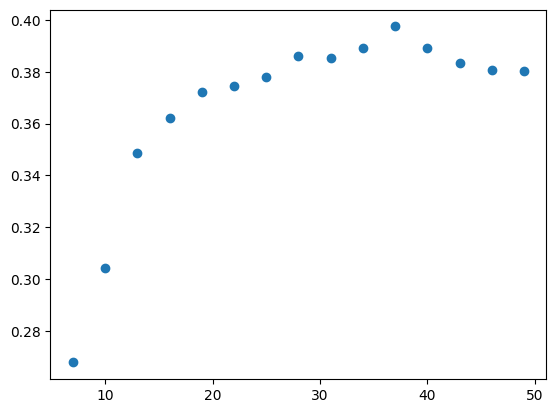

In [44]:
plt.scatter(x=scores.keys(), y=scores.values())
plt.show()

## Parameters

In principle, there are two important parameters to the KNeighbors classifier: 
- the number of neighbors
- how you measure distance between data points. 

In practice, **using a small number of neighbors like three or five often works well**, but you should
certainly adjust this parameter. 

By default, **Euclidean distance is used, which works well in many settings**.

## Strengths

- The model is very easy to understand.
- Often gives reasonable performance without a lot of adjustments.
- Using this algorithm is a good baseline method to try before considering more advanced techniques. 
- KNN can be useful in case of nonlinear data.

## Weaknesses

- The nearest k-neighbors algorithm is not often used in practice, due to **prediction being slow and its inability to handle many features.**

- It requires large memory for storing the entire training dataset for prediction.

- Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow.

- When using the k-NN algorithm, it’s important to preprocess your data.
    - This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).

- Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

## Conclusion

- KNN **performs better with a lower number of features than a large number of features**. 
    - You can say that when the number of features increases than it requires more data. 
    - Increase in dimension also leads to the problem of overfitting. 
    - To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions.

- Research has shown that in large dimension Euclidean distance is not useful anymore.